In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

xls = pd.ExcelFile(r'统计.xlsx')
data=pd.read_excel(xls,1)
data
# print(data)

data.drop_duplicates()
data = data.fillna(method='bfill',axis=0).fillna(method='ffill',axis=0)
x=data[["时间"]]
print(x.shape)
y=data[["粮油烟酒","中西药品","服装","化妆品","金银珠宝","日用品","书报杂志","体育娱乐用品","通信器材","文化办公用品"]]
print(y.shape)

(147, 1)
(147, 10)


In [58]:
# 划分训练集和测试集
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [59]:
x_train

,时间
33,2017.06
110,2011.01
73,2014.02
61,2015.02
68,2014.07
6,2019.09
66,2014.09
90,2012.09
10,2019.05
0,2020.03


In [60]:
x_test

,时间
23,2018.04
28,2017.11
82,2013.05
46,2016.05
122,2010.01
128,2009.07
84,2013.03
89,2012.10
21,2018.06
87,2012.12


In [61]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
print(linreg.intercept_)
print(linreg.coef_)

[-285568.52543905  -89712.13825215 -174856.36380521  -38447.79880711
  -32946.42479595  -79191.31914083  -16229.25218039   -8626.8620179
  -74979.22694936  -50110.06511684]
[[142.43299103]
 [ 44.78066139]
 [ 87.28112826]
 [ 19.16671958]
 [ 16.45370127]
 [ 39.49280806]
 [  8.10313169]
 [  4.304609  ]
 [ 37.34246217]
 [ 24.98759239]]


In [63]:
y_pred = linreg.predict(x_test)
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg,x,y,cv=8) # cv可以调
print("MSE:",metrics.mean_squared_error(y, predicted))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE: 18474.68615369611
RMSE: 135.9216176834874


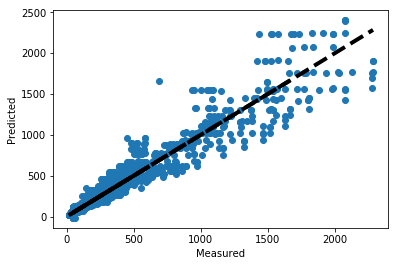

In [64]:
# 可视化图表
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [65]:
# 预测
y_pred = linreg.predict(x_test)
print(y_pred) 

[[1866.94777362  657.02766403 1280.44426253  231.4079713   257.80252236
   506.74723045  123.19169051   60.01112004  379.35540494  315.89582428]
 [1734.48509196  615.38164894 1199.27281325  213.58292209  242.50058017
   470.01891896  115.65577804   56.00783367  344.62691513  292.65736336]
 [1156.20714839  433.57216368  844.91143253  135.7660406   175.698553
   309.67811825   82.75706339   38.53112115  193.01651872  191.20773827]
 [1583.50612147  567.91414786 1106.7548173   193.26619934  225.05965682
   428.15654242  107.06645845   51.44494813  305.04390523  266.17051543]
 [ 723.21085567  297.43895305  579.57680263   77.49921309  125.67930113
   189.61998175   58.12354306   25.4451098    79.49543373  115.24545741]
 [ 589.3238441   255.34513134  497.53254207   59.48249668  110.21282193
   152.49674218   50.50659927   21.39877734   44.39351929   91.75712057]
 [1153.35848857  432.67655046  843.16580996  135.38270621  175.36947898
   308.88826208   82.59500075   38.44502897  192.26966948  1

In [66]:
x_test

,时间
23,2018.04
28,2017.11
82,2013.05
46,2016.05
122,2010.01
128,2009.07
84,2013.03
89,2012.10
21,2018.06
87,2012.12
